# Fitting a Line to Data (part 2)
## A Monte Carlo Simulation
Now that we understand the basics of fitting a line to data, we will now explore what we really want to know; what are the posterior probability distributions of our model parameters given the data.

To do this, we will interpret each data point as a Gaussian PDF with mean of the given value of the data point and a standard deviation equal to the "error" of the data point.

Let's first load our important packages:

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

Now let's define a function that will produce linear data with a given slope and intercept at the same x values as our data. These datapoints will be spread randomly with a standard deviation of the error on the data.

In [14]:
# We need the data to get the x values.
xvals,yvals,yerror = np.loadtxt('line_data.txt',unpack=True)

# These numbers describe our original dataset
slope = 2.5
intercept = 3.2
sig = 1.5

In [15]:
# Function to create linear data with specified characteristics

def random_lin(slope=slope,intercept=intercept,num=9,sig=sig,plot=False):

    # Create a vector of x values
    x = xvals

    # Create linear data from x vector
    y = slope*x + intercept

    # Generate random numbers with zero mean
    r = np.random.normal(0,sig,num)

    # Add noise to y values
    yrand = y + r

    # Plot optional
    if plot:
        plt.figure(1)
        plt.clf()
        plt.errorbar(x,yrand,yerr=sig,fmt='o')

    return x, yrand

Go ahead and generate some random linear data to test it out...

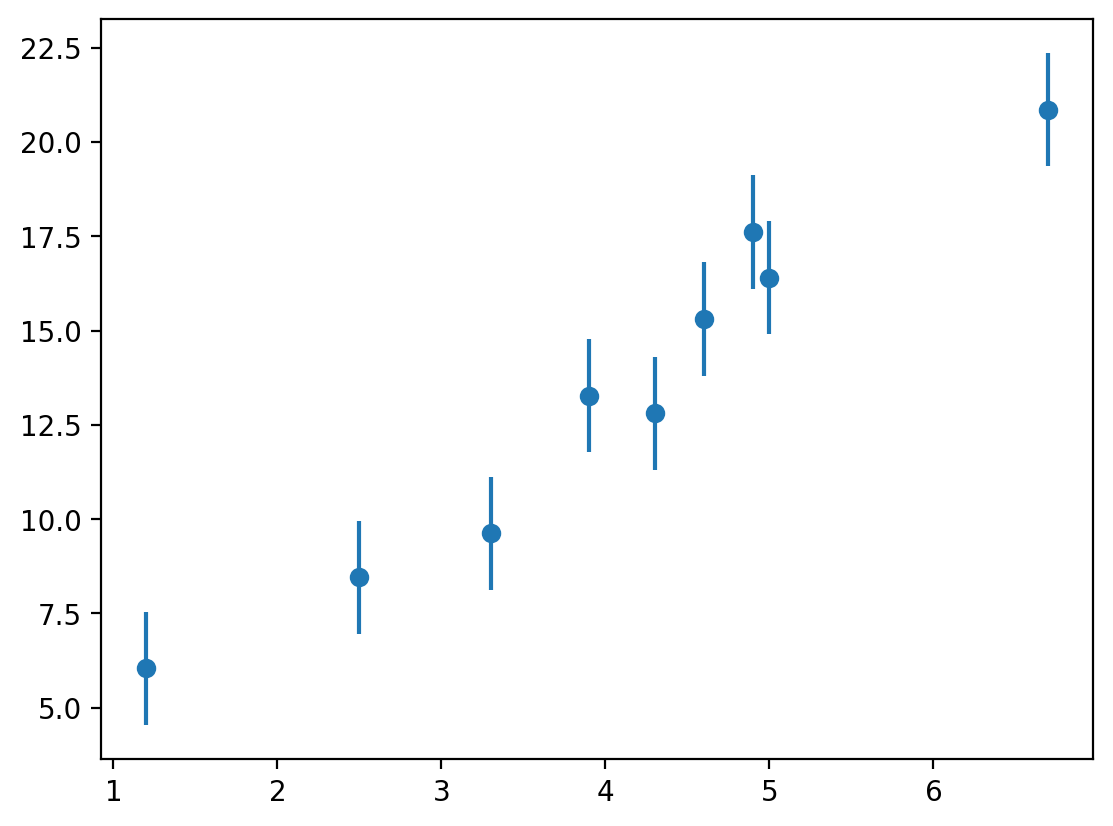

In [16]:
x,y = random_lin(plot=True)

Now let's define a function that will generate random data with our previous function and then fit a line using linear least squares.

In [17]:
def fit_line(yerror=1.5,num=9,plot=False,full=False):

    x,y = random_lin(sig=yerror,num=num,plot=plot)

    weights = 1.0/(yerror**2) * np.ones(num)

    fit = np.polyfit(x,y,1,full=False,w=weights,cov=True)

    fitparams = fit[0]
    slope = fitparams[0]
    intercept = fitparams[1]

    cov = fit[1]

    param_error = np.sqrt(np.diagonal(cov))
    slope_error = param_error[0]
    intercept_error = param_error[1]
    
    if plot:
        plt.plot(x,slope*x+intercept,'r--')

    if full:
        return slope, slope_error, intercept, intercept_error,cov

    return slope, slope_error, intercept, intercept_error

Go ahead and see how this works!

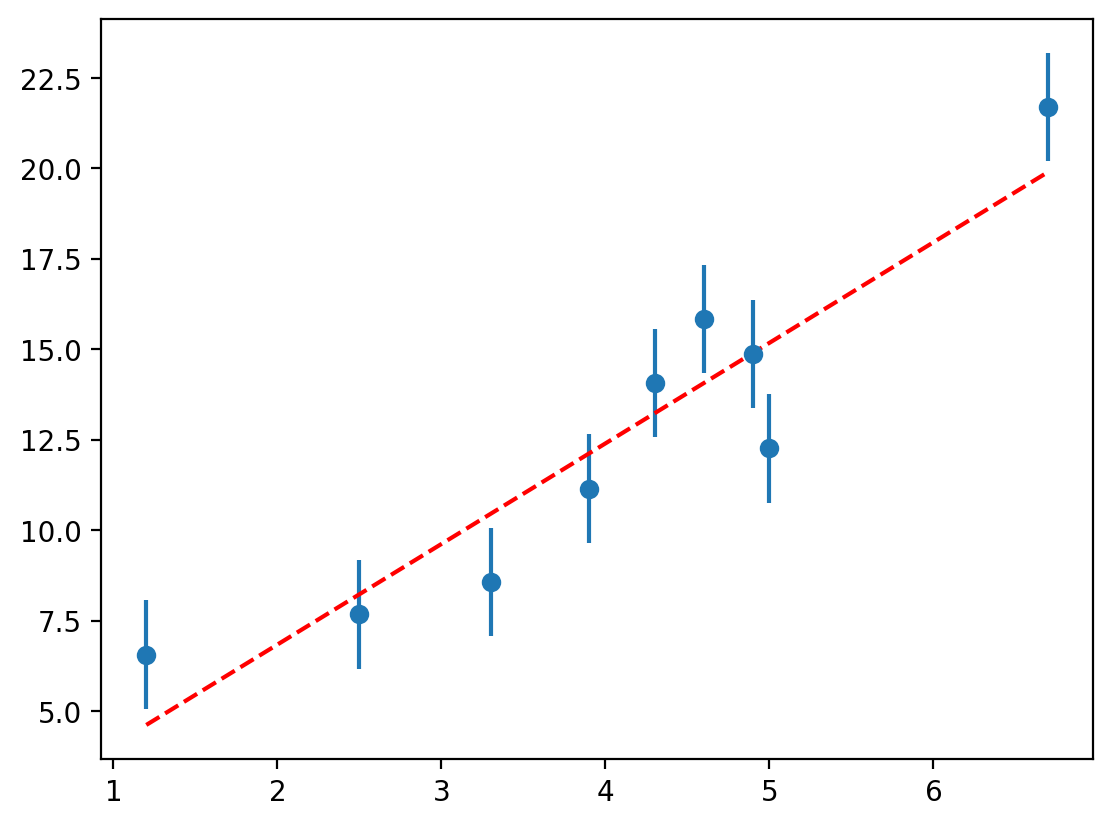

In [18]:
s,s_err,i,i_err = fit_line(plot=True)

Now let's do this a bazillion times (or a godzillion, or however many times you want), and collect the best fit slopes, intercepts and their associated errors.

In [19]:
slope_dist = []
int_dist = []
slope_err = []
int_err = []

for i in range(100000):
    s,se,b,be = fit_line()
    slope_dist = np.append(slope_dist,s)
    slope_err = np.append(slope_err,se)
    int_dist = np.append(int_dist,b)
    int_err = np.append(int_err,be)

Now let's plot up these distributions and see how they look.

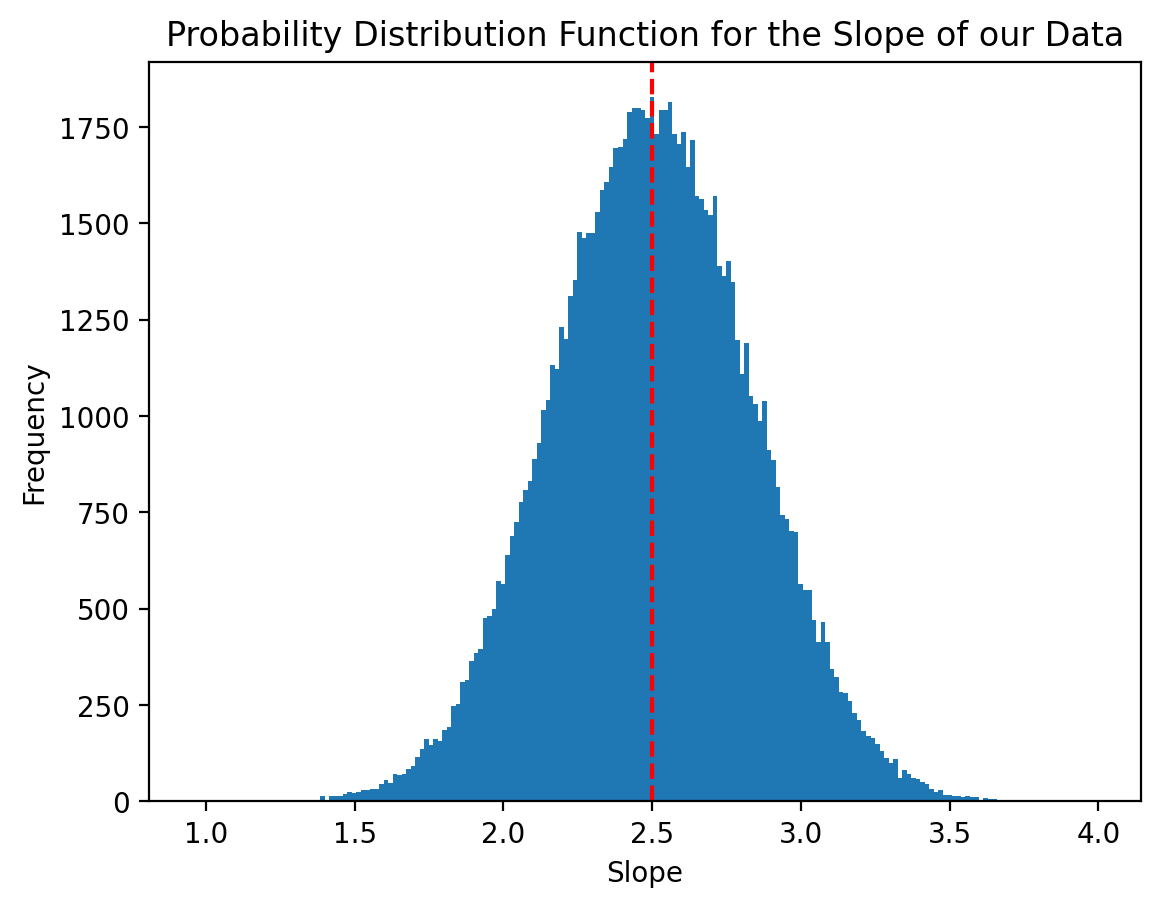

In [20]:
plt.hist(slope_dist,bins=200)
plt.title('Probability Distribution Function for the Slope of our Data')
plt.axvline(x=slope,color='red',linestyle='--')
plt.xlabel('Slope')
plt.ylabel('Frequency');

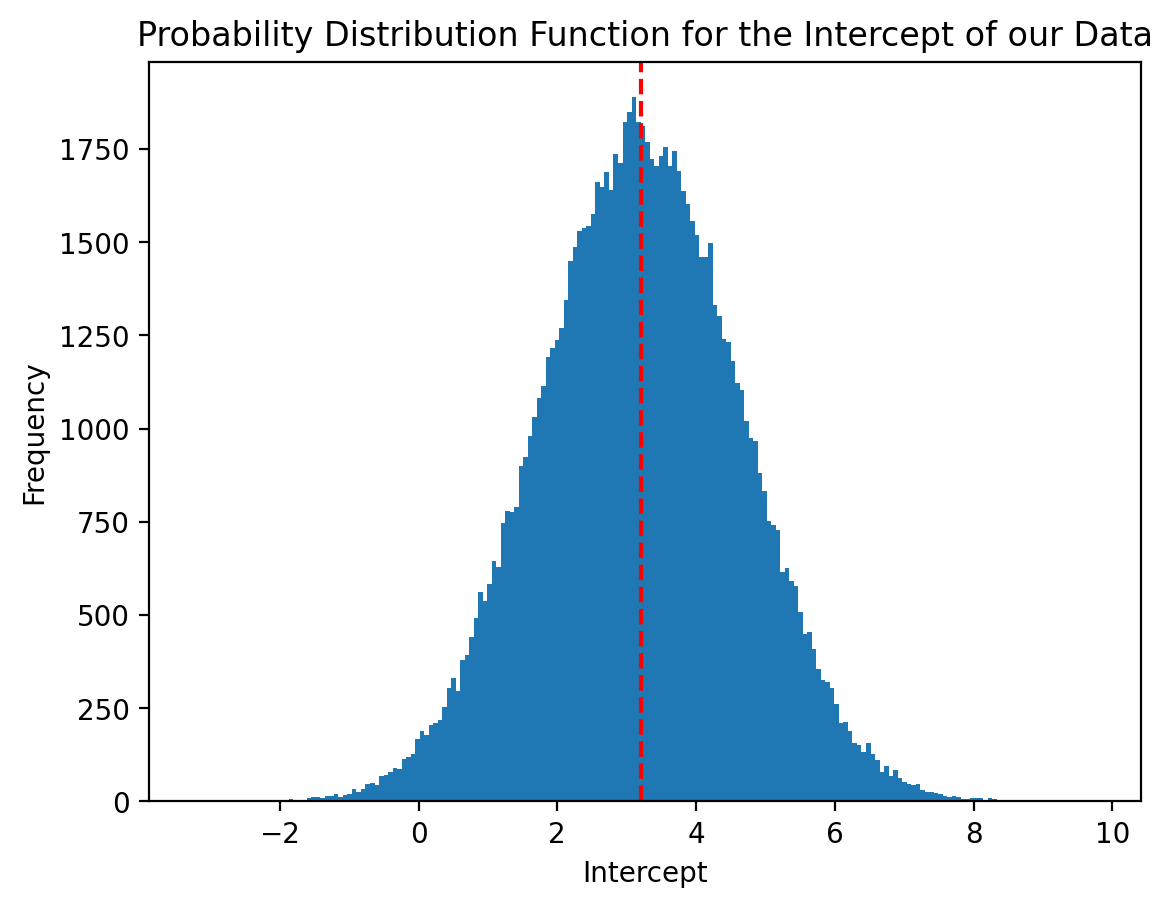

In [21]:
plt.hist(int_dist,bins=200)
plt.title('Probability Distribution Function for the Intercept of our Data')
plt.axvline(x=intercept,color='red',linestyle='--')
plt.xlabel('Intercept')
plt.ylabel('Frequency');

But what have we done here? We have generated the distribution of slopes that result from a dataset with 9 values, each y value being gaussian distributed with a specified standard deviation. This is, by the way, what the [0,0] value of the covariance matrix is trying to estimate. 

We have, in essence, simulated the correct answer. These distributions are what we will soon call 'posterior probability distributions.'

In [22]:
slope_std = np.std(slope_dist,ddof=1)

print('Standard deviation of the slope distribution = %0.3f'% slope_std)
print('Mean of the estimated slope errors from covariance matrix = %0.3f' %(np.mean(slope_err)))

Standard deviation of the slope distribution = 0.335
Mean of the estimated slope errors from covariance matrix = 0.323


In [23]:
int_std = np.std(int_dist,ddof=1)

print('Standard deviation of the intercept distribution = %0.3f'% int_std)
print('Mean of the estimated intercept errors from covariance matrix = %0.3f' %(np.mean(int_err)))

Standard deviation of the intercept distribution = 1.441
Mean of the estimated intercept errors from covariance matrix = 1.393


Another relationship that is often overlooked in this process is not the standard deviation of the distributions of the fit parameters, but rather the <i>co-variance</i> between the two variables. For a line, the slope and intercept have a very large covariance. 

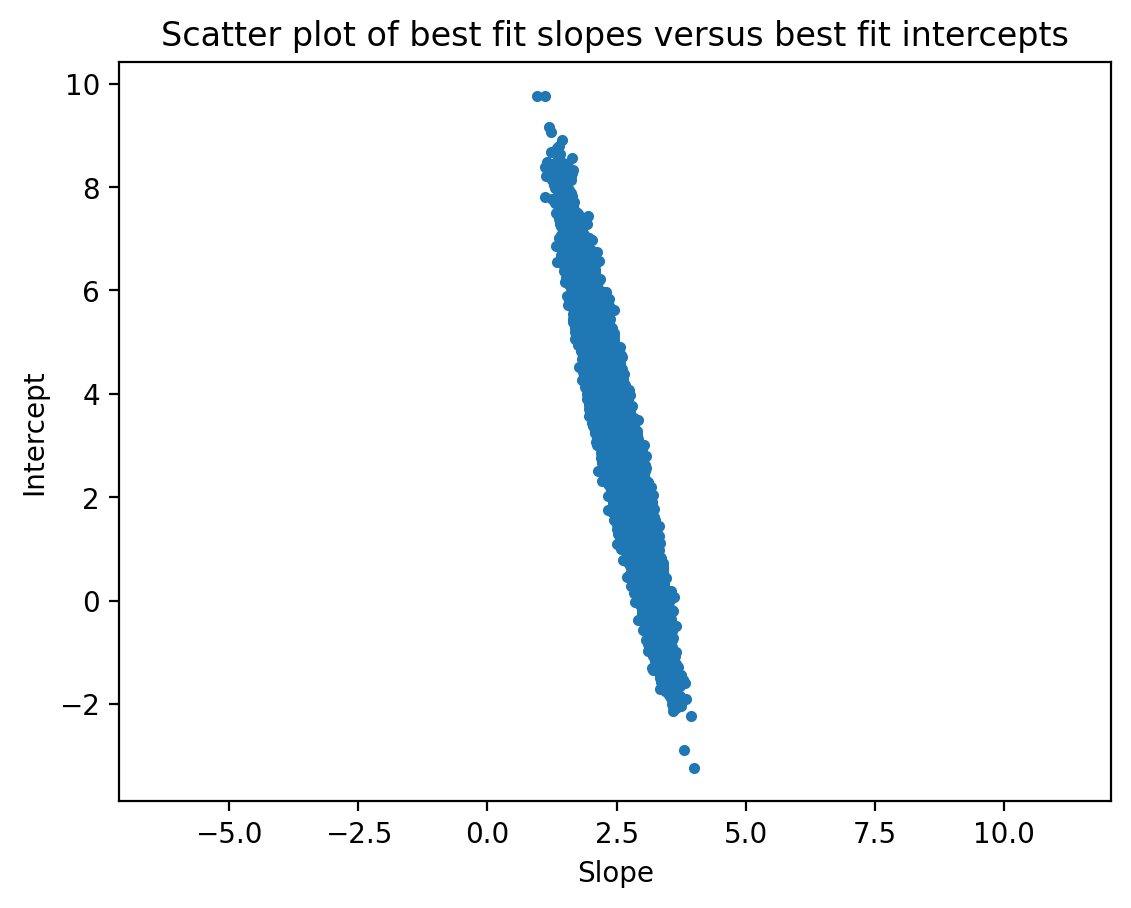

In [24]:
fig,ax=plt.subplots()
plt.plot(slope_dist,int_dist,'.')
plt.title('Scatter plot of best fit slopes versus best fit intercepts')
plt.xlabel('Slope')
plt.ylabel('Intercept')
ax.set_aspect('equal', 'datalim')

How do these numbers compare to our original fit in the Line_Fit_1 python notebook?

What kind of distribution do you expect the residuals of these fits to follow?